<a href="https://colab.research.google.com/github/mahalakruth/SAJRA/blob/main/final24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from transformers import Wav2Vec2ForCTC, SeamlessM4TTokenizer
tokenizer = SeamlessM4TTokenizer.from_pretrained("facebook/seamless-m4t-v2-large")
model = Wav2Vec2ForCTC.from_pretrained("facebook/seamless-m4t-v2-large")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
You are using a model of type seamless_m4t_v2 to instantiate a model of type wav2vec2. This is not supported for all configurations of models and can yield errors.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/seamless-m4t-v2-large and are newly initialized: ['adapter.layers.0.conv.bias', 'adapter.layers.0.conv.weight', 'encoder.layer_norm.bias', 'encoder.layer_norm.weight', 'encoder.layers.0.attention.k_proj.bias', 'encoder.layers.0.attention.k_proj.weight', 'encoder.layers.0.attention.out_proj.bias', 'encoder.layers.0.attention.out_proj.weight', 'encoder.layers.0.attention.q_proj.bias', 'encoder.layers.0.attention.q_proj.weight', 'encoder.layers.0.attention.v_proj.bias', 'encoder.layers.0.attention.v_proj.weight', 'encoder.layers.0.feed_forward.intermediate_dense.bias', 'encoder.layers.0.feed_forward.intermediate_dense.weight', 'encoder.layers.0.feed_forward.output_dense.bias', 'encoder.layers.0.feed_forward.output_dense.weight', 'encoder.layers.0.final_layer_norm.bias', 'encoder.layers.0.final_layer_norm.weight', 'encoder.layers.0.layer_norm.bias', 'encoder.layers.0.layer_norm.weight', 'encoder.layer

In [2]:
from transformers import pipeline

# Initialize the speech recognition pipeline
speech_recognition_pipeline = pipeline("automatic-speech-recognition", model="facebook/seamless-m4t-v2-large")

/usr/local/lib/python3.10/dist-packages/transformers/deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [3]:
# Provide the path to the audio file you want to transcribe
audio_file_path = "/content/ruth2.mp3"

In [4]:
# Transcribe speech
transcription_result = speech_recognition_pipeline(audio_file_path)

transcription_result

You must either specify a `tgt_lang` or pass a correct `text_decoder_input_ids` to get
                a correct generation, otherwise the generation will probably make no sense.


{'text': "Hi guys, I'm Ruth. I love ice cream and biryani. I'm a computer science engineering graduate from Anna University."}

In [5]:
# Access the transcribed text from the result
transcribed_text = transcription_result['text']
transcribed_text

"Hi guys, I'm Ruth. I love ice cream and biryani. I'm a computer science engineering graduate from Anna University."

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
import wave

In [7]:
import librosa

# Load audio file
audio_signal, sample_rate = librosa.load(audio_file_path, sr=None)


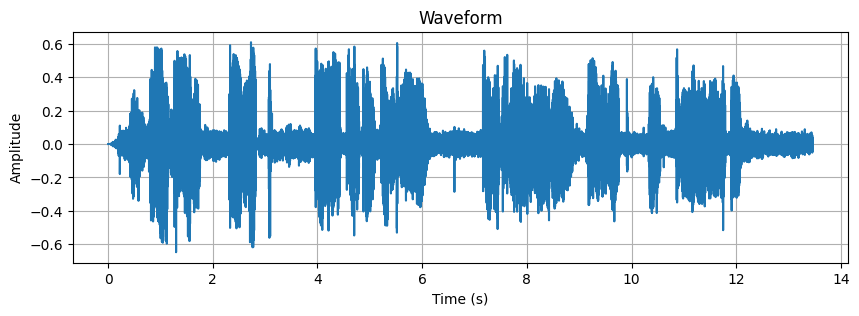

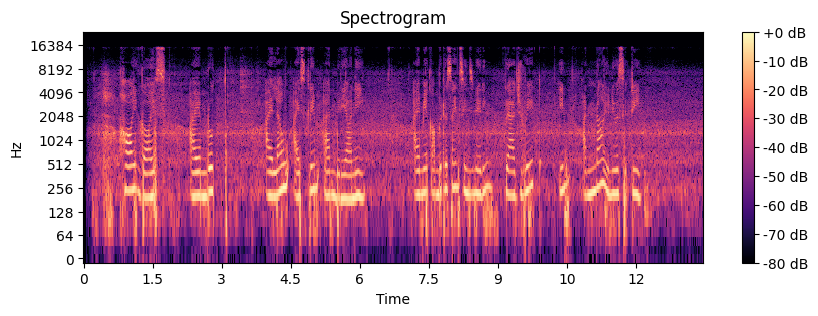

In [8]:
import soundfile as sf

# Load audio file
audio_signal, sample_rate = sf.read(audio_file_path)

# Get audio signal and sample rate
audio_signal, sample_rate = librosa.load(audio_file_path, sr=None)

# Plot waveform
plt.figure(figsize=(10, 3))
plt.plot(np.linspace(0, len(audio_signal) / sample_rate, num=len(audio_signal)), audio_signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.grid()
plt.show()

# Plot spectrogram
plt.figure(figsize=(10, 3))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(audio_signal)), ref=np.max), sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

In [9]:
print(tokenizer)

SeamlessM4TTokenizer(name_or_path='facebook/seamless-m4t-v2-large', vocab_size=256000, model_max_length=1000000000000000019884624838656, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'additional_special_tokens': ['__afr__', '__amh__', '__arb__', '__ary__', '__arz__', '__asm__', '__azj__', '__bel__', '__ben__', '__bos__', '__bul__', '__cat__', '__ceb__', '__ces__', '__ckb__', '__cmn__', '__cmn_Hant__', '__cym__', '__dan__', '__deu__', '__ell__', '__eng__', '__est__', '__eus__', '__fin__', '__fra__', '__fuv__', '__gaz__', '__gle__', '__glg__', '__guj__', '__heb__', '__hin__', '__hrv__', '__hun__', '__hye__', '__ibo__', '__ind__', '__isl__', '__ita__', '__jav__', '__jpn__', '__kan__', '__kat__', '__kaz__', '__khk__', '__khm__', '__kir__', '__kor__', '__lao__', '__lit__', '__lug__', '__luo__', '__lvs__', '__mai__', '__mal__', '__mar__

In [10]:
print(model)

Wav2Vec2ForCTC(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (activation): GELUActivation()
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=1024, bias=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder